# Tugas 3: Data Mining Cup 2013 - Task 1

### Kelompok 9

- Ahmad Rayki Pahlevi 2301596

- Arya Jagadditha 2312239

- Muhammad Daffa Rizmawan Harahap 2310083

- Rasendriya Andhika 2305309

- Yattaqi Ahmad Faza 2311216

### Pendahuluan

### **Pendahuluan**

Pada Tugas 3 ini, kelompok kami diberikan tantangan untuk membangun model klasifikasi yang dapat memprediksi apakah sebuah transaksi akan terjadi berdasarkan pola aktivitas pengguna yang tercatat dalam dataset. Tugas ini berasal dari kompetisi **Data Mining Cup 2013 - Task 1**, yang berfokus pada analisis data transaksi untuk mengidentifikasi pola-pola yang mengindikasikan terjadinya transaksi atau tidak.

Dataset yang digunakan terdiri dari dua file utama, yaitu `transact_train.txt` dan `transact_class.txt`. Set `transact_train.txt` berfungsi sebagai data pelatihan yang berisi sekitar 50.000 sesi dengan atribut target yang diketahui, yaitu kolom `order` yang menunjukkan apakah transaksi terjadi pada sesi tersebut (dengan nilai "y" untuk transaksi dan "n" untuk non-transaksi). Set `transact_class.txt` berfungsi sebagai data pengujian yang berisi sekitar 5.000 sesi, namun tidak memiliki atribut target sehingga model yang dibangun akan digunakan untuk memprediksi transaksi pada data tersebut.

Dengan demikian, tujuan dari tugas ini adalah untuk menghasilkan sebuah model yang dapat memprediksi kemungkinan terjadinya transaksi berdasarkan pola aktivitas yang tercatat pada dataset.

## Import Dataset dan Library

### Melakukan Import Library

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

### Melakukan Import Dataset

Dataset yang diimpor terdiri dari dua file, yaitu transact_train.txt sebagai data training dan transact_class.txt sebagai data evaluasi. Data dari masing-masing file diassign ke variabel "dt" untuk data training dan "dc" untuk data evaluasi. 

In [3]:
# training data
dt = pd.read_csv('transact_train.txt', sep='|')

# classification data
dc = pd.read_csv('transact_class.txt', sep='|')

### Menampilkan Sampel Dataset

In [4]:
dt.head(10)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
5,2,6,5,26.235,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
6,2,6,5,71.200,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
7,2,6,5,94.469,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
8,3,6,5,181.477,9,29.99,29.99,89.97,1,29.99,...,?,3,1800,475,302,12,45,1,11,y
9,3,6,5,297.018,11,9.99,29.99,109.95,2,9.99,...,?,3,1800,475,302,12,45,1,11,y


### Menampilkan Informasi Atribut

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

### Penjelasan Atribut

- sessionNo: Nomor sesi yang bersifat unik untuk setiap sesi.

- startHour: Jam ketika sesi dimulai, dalam rentang 0-23.

- startWeekday: Hari ketika sesi dimulai, direpresentasikan dalam rentang 1-7 (1: Senin,..., 7: Minggu).

- duration: Durasi sesi dalam hitungan detik, berupa nilai desimal.

- cCount: Jumlah produk yang diklik selama sesi.

- bCount: Jumlah produk yang dimasukan ke keranjang belanja.

- bStep: Langkah dari proses pembelian dalam rentang 1-5.

Atribut dibawah ini sampai lastOrder terdapat nilai null/missing values:

- cMinPrice: Harga terendah dari produk yang diklik, dalam nilai desimal.

- cMaxPrice: Harga tertinggi dari produk yang diklik, dalam nilai desimal.

- cSumPrice: Total harga semua produk yang diklik selama sesi, dalam nilai desimal.

- bMinPrice: Harga terendah dari produk yang dimasukan ke keranjang belanja dalam nilai desimal.

- bMaxPrice: Harga tertinggi dari produk yang dimasukan ke keranjang belanja dalam nilai desimal.

- bSumPrice: Total harga semua produk di dalam keranjang belanja dalam nilai desimal.

- onlineStatus: Indikator apakah pelanggan sedang online (y: online, n: tidak).

- availability: Status pengiriman, mungkin status ketersediaan barang dapat dikirim atau tidak, dalam string.

- customerID: Nomor pelanggan dalam string.

- maxVal: Harga maksimal yang dapat dibeli pelanggan.

- customerScore: Skor evaluasi pelanggan oleh toko.

- accountLifetime: Umur dari akun pelanggan dalam bulan.

- payments: Jumlah pembayaran yang dilakukan oleh pelanggan.

- age: Umur pelanggan.

- address: Sapaan untuk pelanggan dalam bentuk numerik (1: Tuan, 2: Nyonya, 3: Perusahaan).

- lastOrder: Hari semenjak transaksi terakhir.

### Melihat Distribusi Data dengan Missing Values

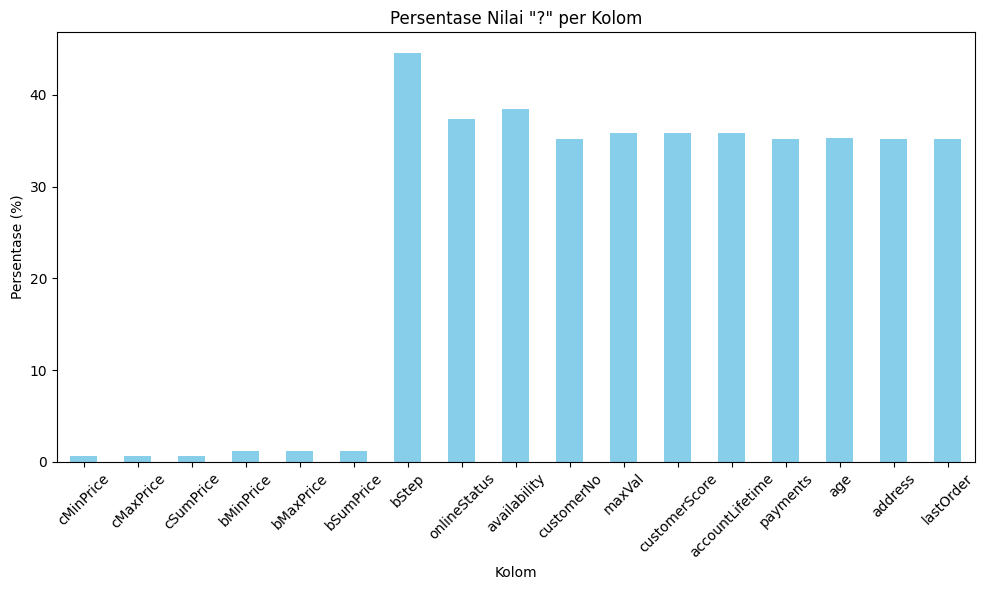

In [6]:
# Fungsi untuk menghitung persentase nilai '?' per kolom
percent_missing = dt.apply(lambda x: (x == '?').mean() * 100)

# Filter hanya kolom yang mengandung nilai '?'
percent_missing = percent_missing[percent_missing > 0]

# Plotting
plt.figure(figsize=(10, 6))
percent_missing.plot(kind='bar', color='skyblue')
plt.title('Persentase Nilai "?" per Kolom')
plt.ylabel('Persentase (%)')
plt.xlabel('Kolom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari Plot diatas terlihat bahwa atribut yang memiliki missing values rendah adalah atribut agregasi dari atribut lainnya. Mungkin missing values disini adalah 0 atau ketika tidak ada produk yang diklik atau dimasukan ke keranjang belanja. 

Disini kami akan membuat plot untuk menampilkan distribusi nilai atribut agregasi tersebut ketika atribut (cCount = 0 atau bCount = 0).

### Melihat Distribusi Beberapa Kolom ketika customerNo  = ?

Kami membuat plot untuk melihat distribusi beberapa atribut, yaitu maxVal, customerScore, accountLifetime, payments, age, address, dan lastOrder, ketika nilai customerNo adalah '?'. Kami menduga bahwa atribut-atribut tersebut memiliki nilai yang hilang (missing values) karena pelanggan tersebut belum mendaftarkan akunnya.

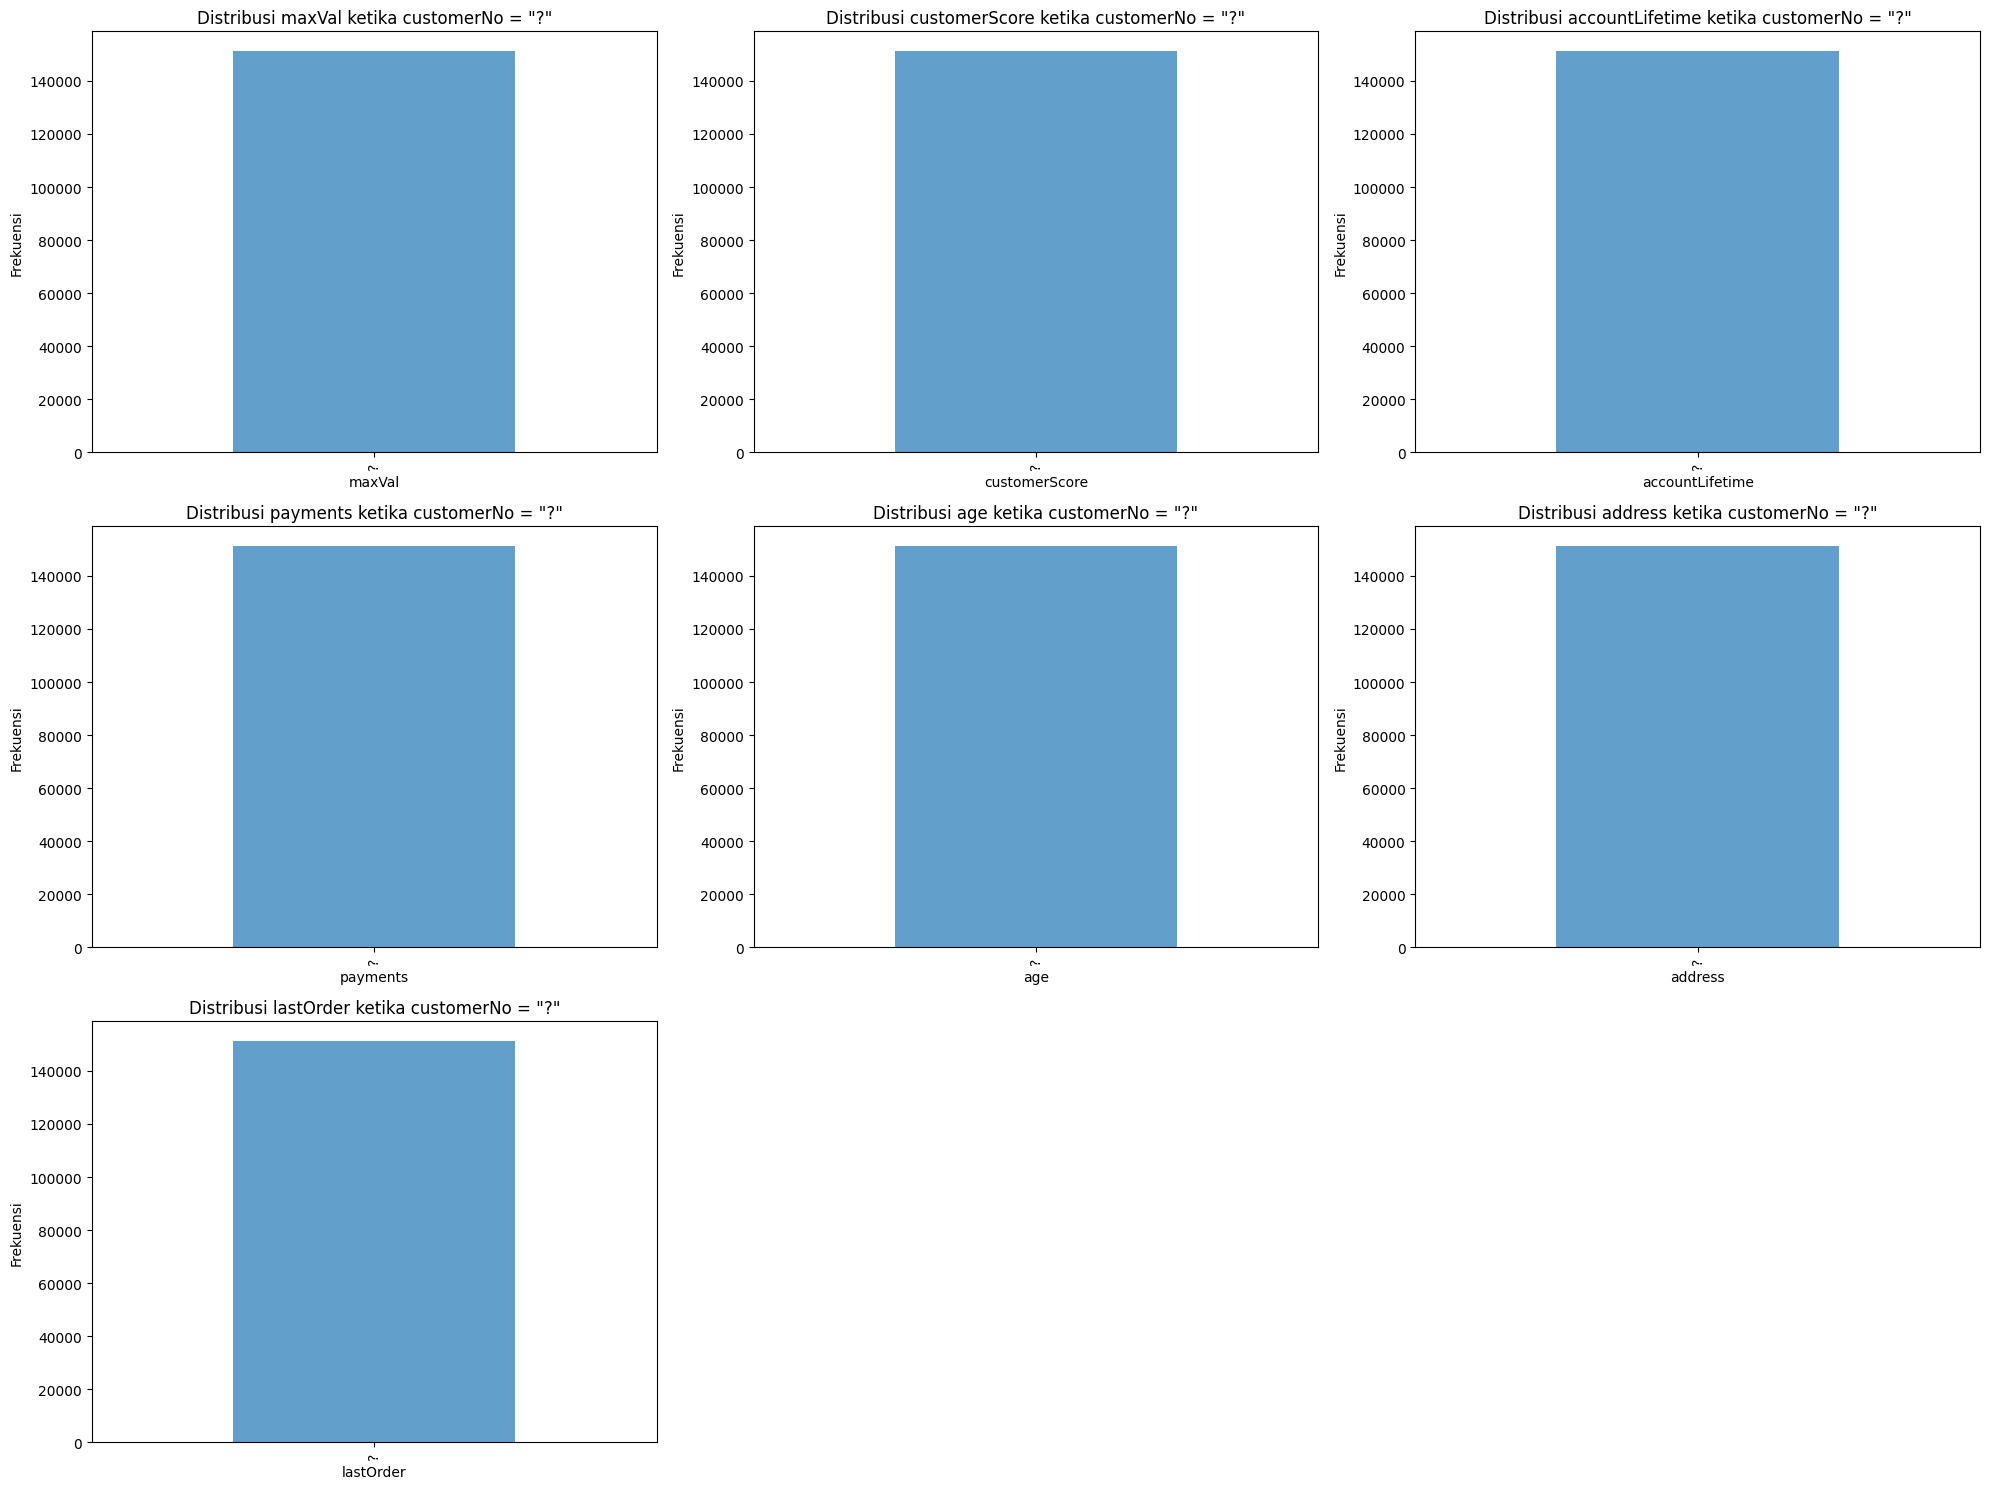

In [7]:
# Filter data di mana customerNo == '?'
dt_customer_no_missing = dt[dt['customerNo'] == '?']

# Pilih kolom untuk dianalisis
columns_to_plot = ['maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']

# Atur ukuran plot
plt.figure(figsize=(20, 15))

# Loop untuk membuat subplot per kolom
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Atur 3 baris, 3 kolom
    dt_customer_no_missing[col].value_counts().plot(kind='bar', alpha=0.7)
    plt.title(f'Distribusi {col} ketika customerNo = "?"')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

# Layout agar plot rapi
plt.tight_layout()
plt.show()

Berdasarkan plot tersebut terbukti atribut-atribut tersebut bernilai '?' ketika customerNo bernilai '?' juga. Maka kami akan mengubah nilai-nilai tersebut menjadi NaN.

In [8]:
# Daftar kolom yang ingin diubah
col_to_nan = ['maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']

# Mengganti nilai '?' dengan NaN pada kolom-kolom tersebut
dt[col_to_nan] = dt[col_to_nan].replace('?', pd.NA)

### Melihat Distribusi Atribut Agregasi Ketika Atribut (cCount = 0 atau bCount = 0).

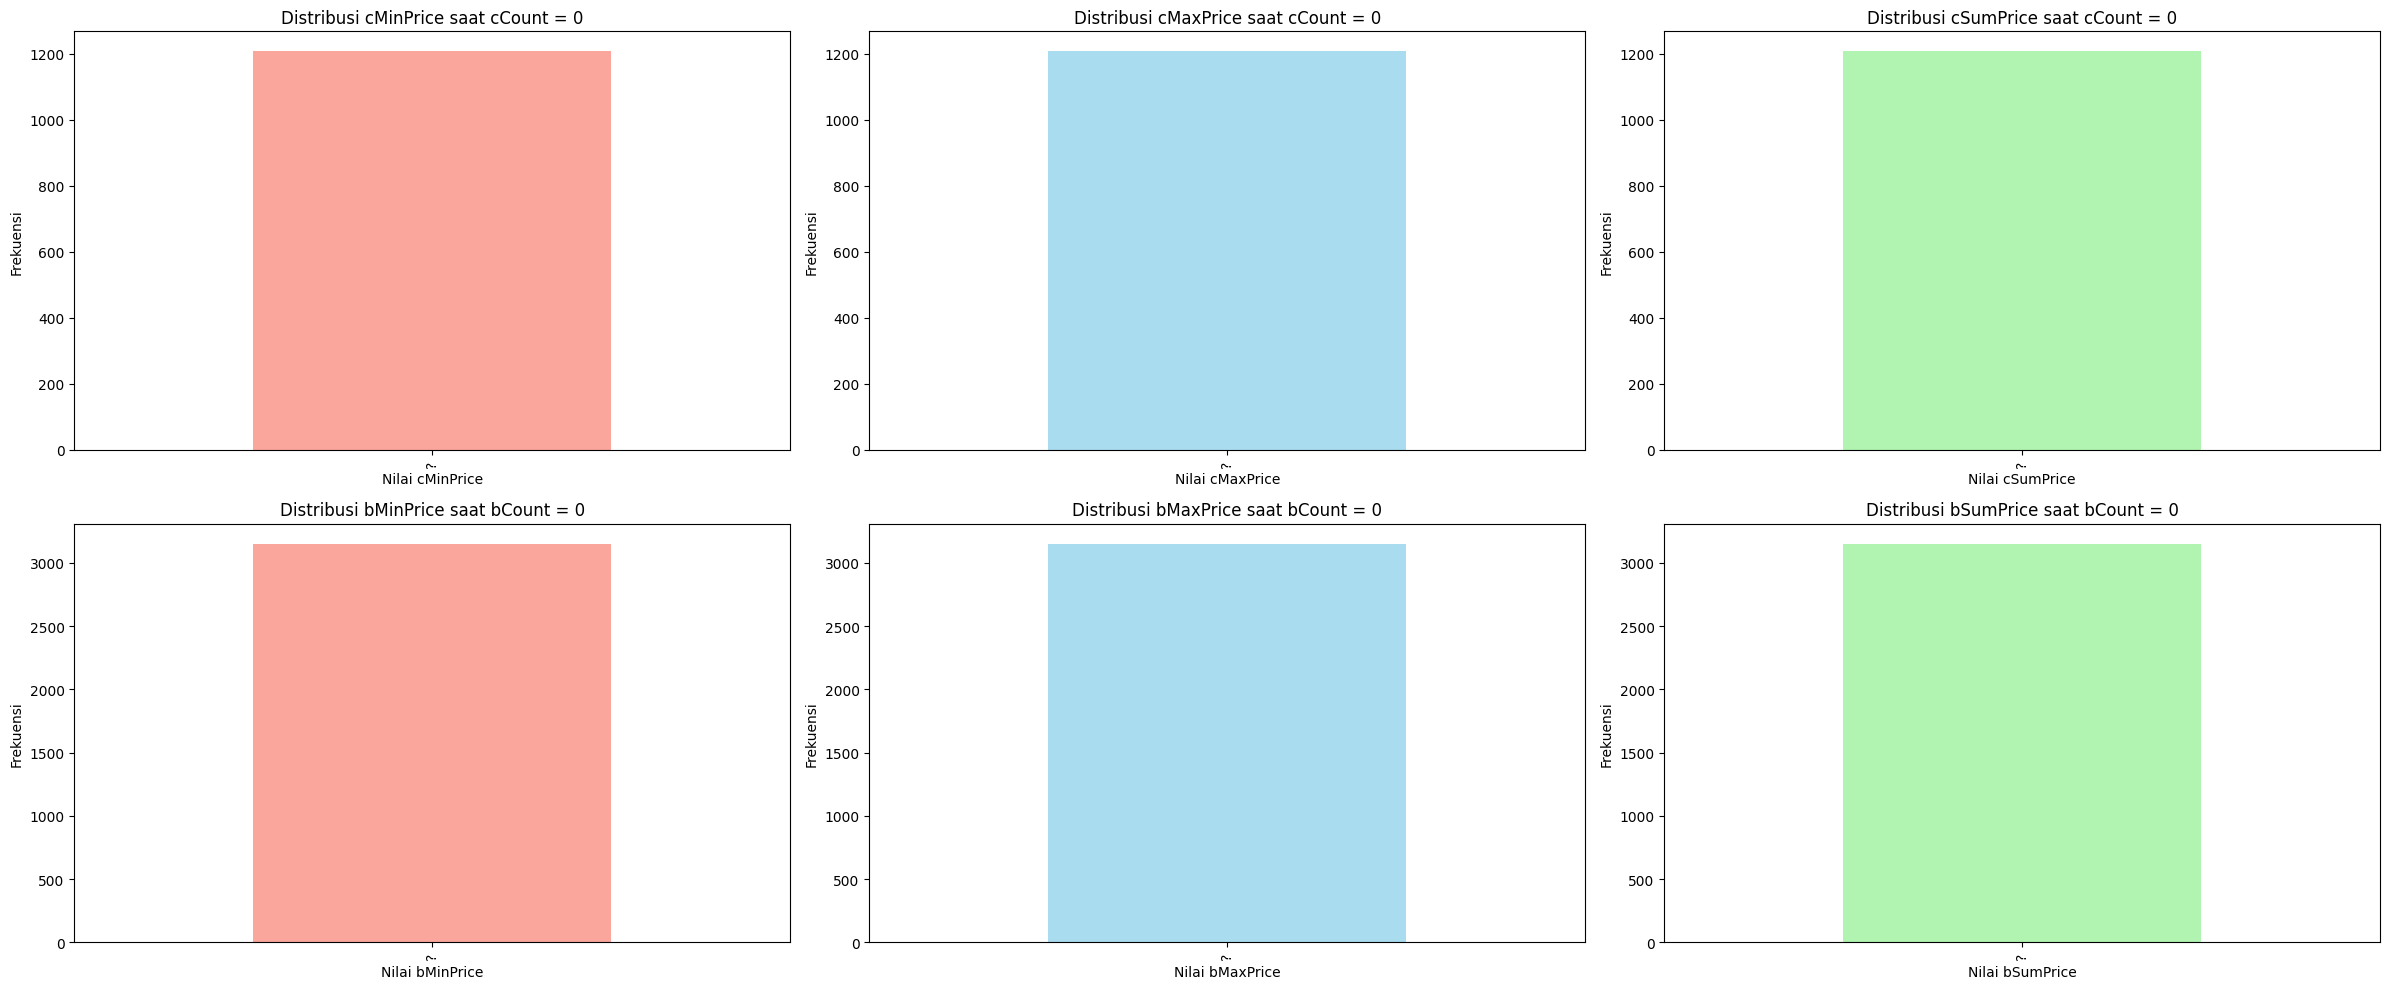

In [9]:
# Filter data yang cCount == 0
dt_zero_count = dt[dt['cCount'] == 0]

# Filter data yang bCount == 0
dt_zero_bcount = dt[dt['bCount'] == 0]

# Buat satu figure dengan 2 baris dan 3 kolom untuk plot pertama dan 4 kolom untuk plot kedua
plt.figure(figsize=(24, 10))

# Plot distribusi cMinPrice, cMaxPrice, cSumPrice ketika cCount == 0
plt.subplot(2, 3, 1)
dt_zero_count['cMinPrice'].value_counts().plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Distribusi cMinPrice saat cCount = 0')
plt.xlabel('Nilai cMinPrice')
plt.ylabel('Frekuensi')

# Plot distribusi cMaxPrice ketika cCount == 0
plt.subplot(2, 3, 2)
dt_zero_count['cMaxPrice'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribusi cMaxPrice saat cCount = 0')
plt.xlabel('Nilai cMaxPrice')
plt.ylabel('Frekuensi')

# Plot distribusi cSumPrice ketika cCount == 0
plt.subplot(2, 3, 3)
dt_zero_count['cSumPrice'].value_counts().plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Distribusi cSumPrice saat cCount = 0')
plt.xlabel('Nilai cSumPrice')
plt.ylabel('Frekuensi')

# Plot distribusi bMinPrice ketika bCount == 0
plt.subplot(2, 3, 4)
dt_zero_bcount['bMinPrice'].value_counts().plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Distribusi bMinPrice saat bCount = 0')
plt.xlabel('Nilai bMinPrice')
plt.ylabel('Frekuensi')

# Plot distribusi bMaxPrice ketika bCount == 0
plt.subplot(2, 3, 5)
dt_zero_bcount['bMaxPrice'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribusi bMaxPrice saat bCount = 0')
plt.xlabel('Nilai bMaxPrice')
plt.ylabel('Frekuensi')

# Plot distribusi bSumPrice ketika bCount == 0
plt.subplot(2, 3, 6)
dt_zero_bcount['bSumPrice'].value_counts().plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Distribusi bSumPrice saat bCount = 0')
plt.xlabel('Nilai bSumPrice')
plt.ylabel('Frekuensi')

# Layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

Berdasarkan plot diatas bisa dilihat bahwa nilai atribut agregasi selalu bernilai "?" ketika nilai bCount atau cCount adalah 0 yang berarti missing values menandakan nilai 0 pada atribut agregasi tersebut.

### Mengubah Missing Values pada Atribut Agregasi menjadi 0

In [10]:
c_update = ['cMinPrice', 'cMaxPrice', 'cSumPrice']

# Terapkan kondisi untuk setiap kolom
for col in c_update:
    dt[col] = np.where(dt['cCount'] == 0, 0, dt[col])

b_update = ['bMinPrice', 'bMaxPrice', 'bSumPrice']

# Terapkan kondisi untuk setiap kolom
for col in b_update:
    dt[col] = np.where(dt['bCount'] == 0, 0, dt[col])

### Melihat Distribusi Missing Values

In [11]:
# Fungsi untuk menghitung persentase nilai '?' per kolom
percent_missing = dt.apply(lambda x: (x == '?').mean() * 100)

# Filter hanya kolom yang mengandung nilai '?'
percent_missing = percent_missing[percent_missing > 0]
percent_missing

cMinPrice        0.363159
cMaxPrice        0.363159
cSumPrice        0.363159
bMinPrice        0.461291
bMaxPrice        0.461291
bSumPrice        0.461291
bStep           44.598415
onlineStatus    37.383249
availability    38.519812
customerNo      35.219912
dtype: float64

Berdasarkan persentase tersebut, ternyata masih terdapat nilai yang hilang untuk atribut agregasi walaupun cCount atau bCountnya bukan 0

In [12]:
# Filter baris di mana cMinPrice == '?'
dt_question_mark = dt[dt['cMinPrice'] == '?']

dt_question_mark.head(100)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
496,66,6,5,454.460,1,?,?,?,1,?,...,?,32,3000,570,224,7,51,2,212,y
497,66,6,5,458.102,1,?,?,?,1,?,...,mainly orderable,32,3000,570,224,7,51,2,212,y
498,66,6,5,475.089,1,?,?,?,1,?,...,completely orderable,32,3000,570,224,7,51,2,212,y
499,66,6,5,497.278,1,?,?,?,1,?,...,completely orderable,32,3000,570,224,7,51,2,212,y
500,66,6,5,560.676,1,?,?,?,1,?,...,completely orderable,32,3000,570,224,7,51,2,212,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14217,1798,9,5,0.000,1,?,?,?,1,?,...,?,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,n
14565,1840,9,5,0.000,1,?,?,?,1,?,...,?,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,n
14567,1841,9,5,0.000,1,?,?,?,1,?,...,?,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,n
14625,1850,9,5,0.000,1,?,?,?,1,?,...,?,899,13000,545,221,67,48,2,11,n


### Melihat Distribusi Atribut Lain yang Masih Memiliki Missing Values

Kami mencoba melihat distribusi atribut bStep, onlineStatus, dan availability karena ketiganya berkaitan dengan langkah atau proses transaksi.

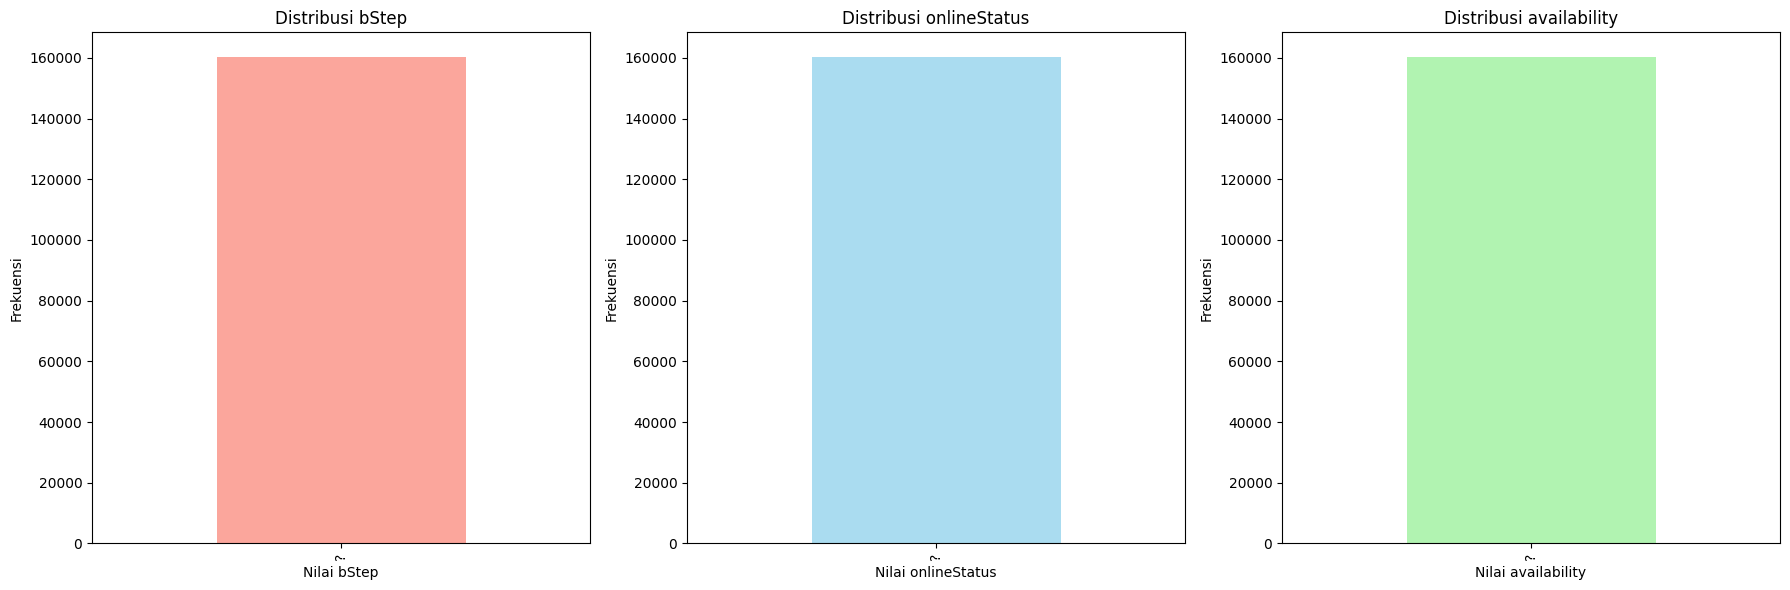

In [13]:
# Buat figure dan atur subplot dengan 1 baris dan 3 kolom
dt_filtered = dt[dt['onlineStatus'] == '?']
plt.figure(figsize=(18, 6))

# Plot distribusi bStep
plt.subplot(1, 3, 1)
dt_filtered['bStep'].value_counts().plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Distribusi bStep')
plt.xlabel('Nilai bStep')
plt.ylabel('Frekuensi')

# Plot distribusi onlineStatus
plt.subplot(1, 3, 2)
dt_filtered['onlineStatus'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribusi onlineStatus')
plt.xlabel('Nilai onlineStatus')
plt.ylabel('Frekuensi')

# Plot distribusi availability
plt.subplot(1, 3, 3)
dt_filtered['availability'].value_counts().plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Distribusi availability')
plt.xlabel('Nilai availability')
plt.ylabel('Frekuensi')

# Layout agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()


### Melihat Distribusi Atribut Ordered untuk melihat Apakah Data Imbalance atau tidak

In [14]:
#Mengecek apakah terdapat nilai NaN pada atribut order
print(dt['order'].isna().sum()) 

0


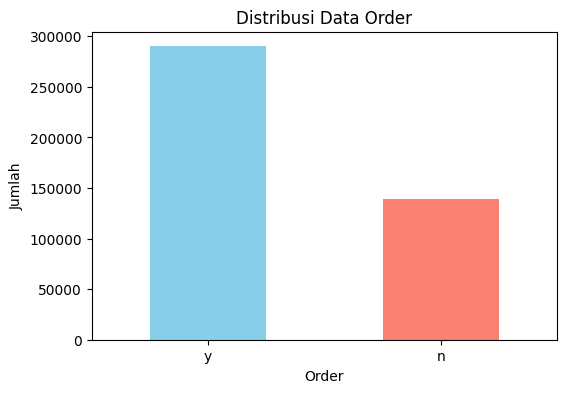

In [15]:
# Menghitung distribusi data
order_counts = dt['order'].value_counts()

# Membuat plot
plt.figure(figsize=(6, 4))
order_counts.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])  # Tambahkan warna untuk missing
plt.title('Distribusi Data Order')
plt.xlabel('Order')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

Terlihat pada plot diatas bahwa penyebaran data pada atribut 'ordered' tidak seimbang, yang dimana 'yes' memiliki jumlah yang jauh lebih banyak dibandingkan 'no'. Sehingga kami pun memutuskan untuk melakukan teknik sampling untuk menyeimbangkan nilai 'yes' dan 'no'.

Kami memilih melakukan oversampling dibandingan undersampling karena menurut kami, apabila kita melakukan undersampling, akan terjadi pembuangan data-data yang berkemungkinan memiliki nilai.

In [16]:
# Memisahkan fitur dan target
x = dt.drop(columns=['order'])  # Fitur lainnya
y = dt['order']                 # Target ('yes'/'no')

# Melakukan oversampling pada data latih
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)

# Memeriksa hasil
print("Jumlah sebelum oversampling:", y.value_counts())
print("Jumlah setelah oversampling:", pd.Series(y_resampled).value_counts())

# Menggabungkan kembali menjadi DataFrame
dt = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name='order')], axis=1)

Jumlah sebelum oversampling: order
y    290030
n    138983
Name: count, dtype: int64
Jumlah setelah oversampling: order
y    290030
n    290030
Name: count, dtype: int64


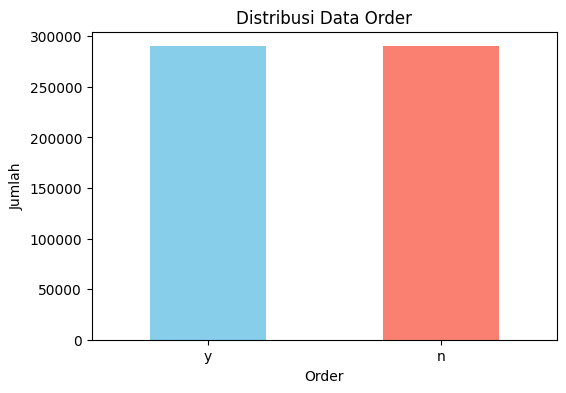

In [17]:
# Menghitung distribusi data
order_counts = dt['order'].value_counts()

# Membuat plot
plt.figure(figsize=(6, 4))
order_counts.plot(kind='bar', color=['skyblue', 'salmon', 'gray'])  # Tambahkan warna untuk missing
plt.title('Distribusi Data Order')
plt.xlabel('Order')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

Pada oversasmpling diatas, kami menggunakan Random Over Sampling yang dimana akan menambahkan data yang pada kolom order memiliki nilai 'no' secara random.

## Pembuangan Atribut

In [18]:
# # pembuangan atribut dan instance
# dt = dt.drop(['age', 'address', 'customerNo', 'customerScore', 'maxVal'], axis=1)
# dc = dc.drop(['age', 'address', 'customerNo', 'customerScore', 'maxVal'], axis=1)

Jadi, kita memutuskan untuk membuang beberapa atribut seperti `age`, `address`, `customerNo`, `customerScore`, dan `maxVal` karena berdasarkan analisis, atribut-atribut tersebut tidak terlalu berpengaruh pada hasil prediksi model. Misalnya, atribut `age` dan `address` mungkin nggak punya hubungan langsung dengan target yang kita coba prediksi, jadi bisa dianggap kurang relevan. Begitu juga dengan `customerNo`, itu lebih bersifat unik untuk setiap pelanggan dan nggak memberikan informasi yang berguna untuk model secara umum. Dengan menghilangkan atribut-atribut yang kurang penting ini, model kita jadi lebih sederhana, lebih cepat dilatih, dan bisa mengurangi risiko overfitting, di mana model bisa terlalu mempelajari detail yang tidak perlu dari data. Jadi, ini semua dilakukan agar model tetap efektif dan efisien tanpa mengurangi akurasi prediksi.

In [19]:
dt.head(10)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,0,0,0,0,0,...,completely orderable,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
4,2,6,5,15.633,0,0,0,0,0,0,...,completely orderable,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
5,2,6,5,26.235,0,0,0,0,0,0,...,completely orderable,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
6,2,6,5,71.200,0,0,0,0,0,0,...,completely orderable,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
7,2,6,5,94.469,0,0,0,0,0,0,...,completely orderable,?,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,y
8,3,6,5,181.477,9,29.99,29.99,89.97,1,29.99,...,?,3,1800,475,302,12,45,1,11,y
9,3,6,5,297.018,11,9.99,29.99,109.95,2,9.99,...,?,3,1800,475,302,12,45,1,11,y


### Penanganan Data Kosong

In [30]:
# Mengonversi kolom bertipe objek ke numerik, mengubah error menjadi NaN
numeric_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice',
                'bMinPrice', 'bMaxPrice', 'bSumPrice',
                'accountLifetime', 'payments', 'lastOrder',
                'customerScore', 'maxVal', 'age']

for col in numeric_cols:
    dt[col] = pd.to_numeric(dt[col], errors='coerce')

In [31]:
def handle_missing_data(df):

    # Mengganti seluruh nilai '?' dengan NaN
    df.replace('?', np.nan, inplace=True)

    # Mengganti nilai NaN sesuai tipe data di setiap kolom
    df.fillna({
        # 'duration': -1,
        # 'cCount': -1,
        # 'bCount': -1,
        # 'startHour': -1,
        # 'startWeekday': -1,

        'age': -1,
        'address': -1, 
        'customerNo': -1, 
        'customerScore': -1, 
        'maxVal': -1,
        'cMinPrice': -1,
        'cMaxPrice': -1,
        'cSumPrice': -1,
        'bMinPrice': -1,
        'bMaxPrice': -1,
        'bSumPrice': -1,
        'accountLifetime': -1,          # Tipe numerik -> -1
        'payments': -1,                 # Tipe numerik -> -1
        'lastOrder': -1,                # Tipe numerik -> -1
        'bStep': -1,                    # Tipe numerik -> -1
        'onlineStatus': 'unknown',      # Tipe string -> 'unknown'
        'availability': 'unknown'       # Tipe string -> 'unknown'

    }, inplace=True)

    # Jika ada kolom lain, bisa disesuaikan tipe datanya secara dinamis
    #df = df.apply(lambda x: x.fillna(-1) if pd.api.types.is_numeric_dtype(x) else x.fillna('unknown'))

    return df

In [32]:
dt = handle_missing_data(dt)
dc = handle_missing_data(dc)

Jadi, kode ini digunakan untuk menangani data yang hilang di dataset supaya model kita tetap bisa berjalan dengan baik meskipun ada nilai yang kosong. Untuk kolom-kolom yang memiliki nilai numerik, seperti `cSumPrice`, `bSumPrice`, `cMinPrice`, dan lainnya, kita mengisi nilai yang hilang dengan rata-rata atau median dari data yang ada. Kalau distribusinya cukup merata, kita pakai rata-rata. Tapi kalau datanya punya banyak pencilan atau nilai ekstrim, lebih baik kita pakai median, supaya nggak mengubah distribusinya terlalu jauh.

Untuk kolom yang isinya kategorikal, kayak `bStep`, `onlineStatus`, dan `availability`, kita mengisinya dengan nilai acak dari pilihan yang relevan. Misalnya, di `bStep` dan `onlineStatus`, kita pilih secara acak nilai yang sesuai dengan kategori yang ada, sementara di `availability`, kita pilih salah satu dari beberapa opsi yang masuk akal. Tujuannya, supaya data yang hilang tetap terisi dengan nilai yang wajar dan nggak membuat model jadi bias. Dengan cara ini, kita bisa memastikan bahwa model kita tetap punya data yang lengkap dan representatif, tanpa terpengaruh oleh nilai yang hilang.

In [33]:
dt.head(10)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,unknown,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,0.00,0.00,0.00,0,0.00,...,completely orderable,-1,-1,-1,-1,-1,-1,-1,-1,y
4,2,6,5,15.633,0,0.00,0.00,0.00,0,0.00,...,completely orderable,-1,-1,-1,-1,-1,-1,-1,-1,y
5,2,6,5,26.235,0,0.00,0.00,0.00,0,0.00,...,completely orderable,-1,-1,-1,-1,-1,-1,-1,-1,y
6,2,6,5,71.200,0,0.00,0.00,0.00,0,0.00,...,completely orderable,-1,-1,-1,-1,-1,-1,-1,-1,y
7,2,6,5,94.469,0,0.00,0.00,0.00,0,0.00,...,completely orderable,-1,-1,-1,-1,-1,-1,-1,-1,y
8,3,6,5,181.477,9,29.99,29.99,89.97,1,29.99,...,unknown,3,1800,475,302,12,45,1,11,y
9,3,6,5,297.018,11,9.99,29.99,109.95,2,9.99,...,unknown,3,1800,475,302,12,45,1,11,y


In [34]:
dc.head(10)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
0,1,18,7,136.833,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039,1300,489,188,5,49,1,65
1,1,18,7,189.984,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039,1300,489,188,5,49,1,65
2,1,18,7,342.894,6,16.99,39.99,113.96,2,16.99,...,unknown,unknown,25039,1300,489,188,5,49,1,65
3,1,18,7,411.051,8,16.99,39.99,149.94,3,16.99,...,unknown,unknown,25039,1300,489,188,5,49,1,65
4,1,18,7,460.049,10,16.99,39.99,189.92,4,16.99,...,unknown,unknown,25039,1300,489,188,5,49,1,65
5,1,18,7,471.502,10,16.99,39.99,189.92,4,16.99,...,y,completely orderable,25039,1300,489,188,5,49,1,65
6,1,18,7,560.026,11,16.99,39.99,207.91,5,16.99,...,unknown,unknown,25039,1300,489,188,5,49,1,65
7,1,18,7,564.597,11,16.99,39.99,207.91,5,16.99,...,y,completely orderable,25039,1300,489,188,5,49,1,65
8,1,18,7,624.606,11,16.99,39.99,207.91,5,16.99,...,y,completely orderable,25039,1300,489,188,5,49,1,65
9,2,18,7,133.321,7,34.99,34.99,69.98,1,34.99,...,unknown,unknown,25040,1200,543,43,5,29,2,184


### Grouping berdasarkan sessionNo dan Agregasi

Sebelum kita melakukan grouping, kita perlu memfilter terlebih dahulu agar tidak terjadi interpretasi data yang salah.

In [35]:
def safe_mode(series, exclude_value='unknown'):
    filtered = series[series != exclude_value]
    return filtered.mode()[0] if not filtered.mode().empty else exclude_value

In [38]:
# Mengelompokkan data berdasarkan 'sessionNo' dengan menjaga semua kolom awal, setiap kolom diagregasi sesuai dengan datanya
dt = dt.groupby('sessionNo').agg({
    'duration': lambda x: x[x != -1].sum(),
    'cCount': lambda x: x[x != -1].sum(),
    'cMinPrice': lambda x: x[x != -1].min(),
    'cMaxPrice': lambda x: x[x != -1].max(),
    'cSumPrice': lambda x: x[x != -1].sum(),
    'bCount': lambda x: x[x != -1].sum(),
    'bMinPrice': lambda x: x[x != -1].min(),
    'bMaxPrice': lambda x: x[x != -1].max(),
    'bSumPrice': lambda x: x[x != -1].sum(),
    'bStep': lambda x: safe_mode(x, exclude_value=-1),
    'onlineStatus': lambda x: safe_mode(x, exclude_value='unknown'),
    'availability': lambda x: safe_mode(x, exclude_value='unknown'),
    'startHour': 'first',
    'startWeekday': 'first',
    'accountLifetime': 'first',
    'payments': 'first',
    'lastOrder': 'first',
    'order': 'first'
}).reset_index()

dc = dc.groupby('sessionNo').agg({
    'duration': lambda x: x[x != -1].sum(),
    'cCount': lambda x: x[x != -1].sum(),
    'cMinPrice': lambda x: x[x != -1].min(),
    'cMaxPrice': lambda x: x[x != -1].max(),
    'cSumPrice': lambda x: x[x != -1].sum(),
    'bCount': lambda x: x[x != -1].sum(),
    'bMinPrice': lambda x: x[x != -1].min(),
    'bMaxPrice': lambda x: x[x != -1].max(),
    'bSumPrice': lambda x: x[x != -1].sum(),
    'bStep': lambda x: safe_mode(x, exclude_value=-1),
    'onlineStatus': lambda x: safe_mode(x, exclude_value='unknown'),
    'availability': lambda x: safe_mode(x, exclude_value='unknown'),
    'startHour': 'first',
    'startWeekday': 'first',
    'accountLifetime': 'first',
    'payments': 'first',
    'lastOrder': 'first'
}).reset_index()

Jadi, kode ini digunakan untuk mengelompokkan data berdasarkan kolom `sessionNo`, yang berarti setiap grup data yang memiliki nomor sesi yang sama akan digabungkan. Setelah pengelompokkan, setiap kolom data akan dihitung ulang menggunakan fungsi agregasi yang sesuai dengan jenis data di kolom tersebut. Misalnya, untuk kolom yang berisi angka seperti `duration`, `cCount`, `cSumPrice`, kita menjumlahkan nilai-nilainya menggunakan `sum()`, karena kita ingin tahu totalnya dalam satu sesi. Sementara untuk kolom harga seperti `cMinPrice` dan `cMaxPrice`, kita mengambil nilai terkecil dan terbesar menggunakan `min()` dan `max()`.

Pada kolom kategori seperti `bStep`, `onlineStatus`, dan `availability`, kita menggunakan modus (nilai yang paling sering muncul) untuk menggantikan nilai yang hilang atau untuk menggabungkan nilai dalam satu sesi. Jika tidak ada modus yang jelas, kita mengisinya dengan `np.nan` (nilai kosong). Untuk kolom lain seperti `startHour`, `startWeekday`, `accountLifetime`, dan sebagainya, kita hanya mengambil nilai pertama karena data tersebut diasumsikan tidak berubah dalam satu sesi.

Dengan cara ini, kita mengubah data yang sebelumnya tersebar per baris menjadi lebih teragregasi per sesi, sehingga lebih mudah untuk menganalisis atau memodelkan data berdasarkan unit `sessionNo` tanpa kehilangan informasi penting. Kode ini memungkinkan kita untuk menjaga integritas data dan tetap mengoptimalkan proses analisis.

In [39]:
dt.head(10)

,sessionNo,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,startHour,startWeekday,accountLifetime,payments,lastOrder,order
0,1,51.827,3,59.99,59.99,179.97,3,59.99,59.99,179.97,2,y,completely orderable,6,5,21,1,49,y
1,2,207.537,0,0.00,0.00,0.00,0,0.00,0.00,0.00,4,y,completely orderable,6,5,-1,-1,-1,y
2,3,1455.353,53,9.99,29.99,529.77,9,9.99,29.99,189.91,4,y,completely orderable,6,5,302,12,11,y
3,4,114.495,12,4.99,4.99,59.88,3,4.99,4.99,14.97,1,y,completely not orderable,6,5,-1,-1,-1,n
4,5,12310.330,215,12.99,179.95,4943.15,26,19.99,27.85,684.80,4,y,completely orderable,6,5,18,1,40,y
5,6,0.000,9,99.99,169.00,1118.92,9,99.99,169.00,1118.92,-1,unknown,unknown,6,5,-1,-1,-1,n
6,7,8216.285,149,3.00,40.00,1420.00,29,3.00,3.00,87.00,1,y,completely orderable,6,5,35,10,10,y
7,8,0.000,5,59.99,59.99,299.95,5,59.99,59.99,299.95,-1,unknown,unknown,6,5,3,10,57,n
8,9,1858.220,12,499.99,499.99,5999.88,6,499.99,499.99,2999.94,2,y,completely orderable,6,5,-1,-1,-1,y
9,10,2233.558,41,5.00,24.99,528.22,5,12.00,19.99,75.98,-1,unknown,unknown,6,5,55,23,24,n


In [40]:
dc.head(10)

,sessionNo,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep,onlineStatus,availability,startHour,startWeekday,accountLifetime,payments,lastOrder
0,1,3761.542,73,16.99,39.99,79.9879.98113.96149.94189.92189.92207.91207.91...,30,16.99,39.99,39.9939.9956.9874.9794.9694.96112.95112.95112.95,1,y,completely orderable,18,7,188,5,65
1,2,14046.089,113,34.99,34.99,69.9869.9869.9869.9869.9869.9869.98174.95174.9...,15,34.99,34.99,34.9934.9934.9934.9934.9934.9934.9969.9869.986...,4,y,completely orderable,18,7,43,5,184
2,3,107049.958,1815,17.99,59.95,53.97137.93583.4703.251177.621282.591797.31997...,201,12.49,39.95,17.9940.9880.93120.88150.83185.82224.98264.932...,2,y,completely orderable,18,7,17,4,107
3,4,16223.585,868,3.99,239.99,5497.635527.65572.575572.575572.575642.5,16,9.99,9.99,9.9919.9834.9734.9734.9744.96,1,y,completely orderable,18,7,226,19,17
4,5,63.261,4,29.99,29.99,59.9859.98,2,29.99,29.99,29.9929.99,2,y,completely orderable,18,7,39,2,234
5,6,9203.161,131,10.99,39.99,277.48433.36449.34,6,10.99,10.99,10.9920.9828.97,-1,unknown,unknown,18,7,352,9,28
6,7,493.223,11,14.99,19.99,14.9929.98129.92,5,14.99,14.99,14.9929.9829.98,1,y,completely orderable,18,7,-1,-1,-1
7,8,3525.261,74,8.99,99.99,570.8648.74,3,12.99,14.99,14.9927.98,-1,unknown,unknown,18,7,-1,-1,-1
8,9,68.599,4,59.99,79.99,299.96,1,79.99,79.99,79.99,-1,unknown,unknown,18,7,73,14,4
9,10,81071.954,2300,5.0,39.99,541.78664.5696.46696.46696.46696.46696.46696.4...,69,19.99,19.99,19.9927.9835.9735.9735.9735.9735.9735.9745.964...,2,y,completely orderable,18,7,-1,-1,-1


### One-hot Encoding

In [41]:
# one-hot encoding untuk tipe kategori
dt = pd.get_dummies(data=dt, columns=['onlineStatus','availability'])
dc = pd.get_dummies(data=dc, columns=['onlineStatus','availability'])

Di kode ini, kami melakukan one-hot encoding pada kolom-kolom kategori, yaitu 'onlineStatus' dan 'availability' yang hasilnya adalah DataFrame yang memiliki kolom-kolom baru yang menggantikan kolom kategori dengan representasi numerik biner.

In [42]:
dt.shape

(50000, 28)

In [43]:
dc.shape

(5111, 26)

## Proses Pembuatan Model

### Menggunakan Data Training

In [44]:
# ubah atribut yang akan menjadi label menggunakan LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dt['order'])
Y = le.transform(dt['order'])

Jadi, kode ini diperlukan untuk mengubah kolom yang berisi data kategorikal, seperti `order`, menjadi format numerik yang bisa diproses oleh model pembelajaran mesin. Kolom `order` mungkin berisi nilai-nilai seperti 'completed', 'pending', atau kategori lainnya yang tidak bisa langsung digunakan dalam model yang membutuhkan input numerik. 

Dengan menggunakan `LabelEncoder`, kita bisa mengubah setiap kategori unik menjadi angka. Misalnya, 'completed' bisa jadi 0, 'pending' jadi 1, dan seterusnya, tergantung pada urutan yang dipelajari oleh encoder. Proses pertama, yaitu `le.fit(dt['order'])`, itu untuk "melatih" si encoder mengenali kategori-kategori yang ada di kolom `order`. Setelah itu, dengan `le.transform(dt['order'])`, kita mengubah nilai-nilai kategori itu menjadi angka, dan hasilnya disimpan dalam variabel `Y`. 

Alasan kita melakukan ini adalah karena banyak algoritma pembelajaran mesin yang hanya bisa menerima input numerik. Jadi, agar model bisa bekerja dengan data kita, kita perlu mengonversi data kategorikal ini menjadi format yang bisa dipahami oleh model. Dengan cara ini, kita memastikan bahwa data kita siap untuk diproses lebih lanjut tanpa kesalahan.

In [45]:
# siapkan atribut training dengan membuang kelas label
X = dt.drop("order", axis = 1)

Kode ini saya gunakan untuk mempersiapkan data sebelum proses *training*. Pertama, saya mengubah kolom `order` yang menjadi label atau target menggunakan `LabelEncoder`. Tujuannya adalah untuk mengonversi data dari format teks seperti `'y'` (pembelian) dan `'n'` (tidak pembelian) menjadi nilai numerik, karena algoritma pembelajaran mesin hanya bisa memproses data dalam bentuk angka. Ini memastikan data target siap digunakan oleh model.

### Split Dataset

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


# simpan nama kolom untuk keperluan prediksi nanti
# pickle adalah library untuk menyimpan file
import pickle
with(open('transact_train.pickle', 'wb')) as fp:
    pickle.dump(X_train.columns, fp)

Kode ini saya gunakan untuk membagi dataset menjadi dua bagian: data *training* dan data *testing*. Saya menggunakan fungsi `train_test_split` dengan parameter `test_size=0.2`, yang berarti 80% data akan digunakan untuk melatih model (*training*), sementara 20% sisanya untuk menguji performa model (*testing*). Saya juga menambahkan `random_state=123` agar pembagian dataset konsisten setiap kali kode dijalankan. Setelah itu, saya menyimpan nama kolom atribut dari data *training* menggunakan pustaka `pickle`. Langkah ini penting agar nama kolom tetap tersedia untuk keperluan prediksi di tahap berikutnya.

### XG Boost

In [56]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective = "multi:softprob", num_class = 4, eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)

# num_class adalah jumlah kelas
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:bStep: object

Kami menggunakan algoritma Random Forest untuk membuat model prediksi dengan memanfaatkan pustaka RandomForestClassifier. Model ini dilatih menggunakan data training (X_train dan Y_train) untuk mengenali pola dalam dataset. Parameter n_estimators=50 menunjukkan bahwa model akan menggunakan 50 pohon keputusan, dan random_state=123 memastikan hasil pelatihan konsisten. Setelah pelatihan selesai, saya melakukan prediksi pada data testing (X_test) untuk mengukur performa model. Akhirnya, model yang sudah dilatih disimpan ke dalam file menggunakan pustaka pickle agar dapat digunakan kembali tanpa perlu melatih ulang.

### Menampilkan Akurasi, Classification Report, Confusion Matrix, dan Fitur Penting

In [23]:
# Calculate accuracy
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))

# Print detailed classification report
print(classification_report(Y_test, Y_pred))

print(confusion_matrix(Y_test, Y_pred))

feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

Akurasi 0.8316
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      5419
           1       0.78      0.88      0.83      4581

    accuracy                           0.83     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.84      0.83      0.83     10000

[[4271 1148]
 [ 536 4045]]
                                          importance
bCount                                      0.186349
availability_completely orderable           0.095447
duration                                    0.085836
bSumPrice                                   0.076482
cCount                                      0.067239
cSumPrice                                   0.051207
sessionNo                                   0.044632
accountLifetime                             0.042996
payments                                    0.038973
lastOrder                                   0.038226
bMinPrice                                   0.03

### Hasil yang didapat

- Akurasi: 0.8311, yang berarti model berhasil memprediksi label dengan tingkat akurasi sekitar 83.1%. Ini menunjukkan bahwa model cukup baik dalam memprediksi kelas.

- Precision: Pada kelas 0, precision 0.89 atau 89% prediksi kelas 0 adalah benar. Sementara pada kelas 1, precision 0.78 atau 78% prediksi kelas 1 adalah benar.

- Recall: Pada kelas 0, recall 0.79 atau 79% data kelas 0 berhasil terdeteksi model. Sementara pada kelas 1, recall 0.88 atau 88% data kelas 1 berhasil terdeteksi model.

- F1-Score: Pada kelas 0 adalah 0.84 dan kelas 1 adalah 0.83

- Confusion Matrix:  Model berhasil memprediksi kelas 1 dengan benar sebanyak 4029 prediksi dan 4282 prediksi untuk kelas 0. Sementara terdapat 1137 prediksi kelas 0 yang salah dan 552 prediksi kelas 1 yang salah.

- Feature Importance: bCount, availability_completely, orderable, duration adalah beberapa fitur yang memiliki pengaruh tertinggi pada model.

## Prediksi Data Class Menggunakan Trained Model

### Import Data Real Class dan Pisahkan Real Prediction

In [24]:
rc = pd.read_csv('realclass_t1.txt', sep='|', na_values='?')
rc.info()


real_pred = rc['prediction'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sessionNo   5111 non-null   int64
 1   prediction  5111 non-null   int64
dtypes: int64(2)
memory usage: 80.0 KB


- Membaca Dataset realclass_t1.txt, yang diperlukan sebagai data pembanding untuk mengevaluasi hasil prediksi model.
- Menggunakan parameter na_values='?', untuk menangani data yang hilang (missing values), sehingga mencegah kesalahan selama proses analisis.
- Mengekstrak kolom prediction untuk dibandingkan dengan hasil prediksi model (digunakan sebagai data aktual/ground truth).

### Load Kembali Trained Model dan Lakukan Prediksi pada Data Class

In [25]:
# Load the trained model from the pickle file
with open('random_forest_model.pickle', 'rb') as f:
    clf = pickle.load(f)

# Load the column names for features from the pickle file
with open('transact_train.pickle', 'rb') as fp:
    feature_columns = pickle.load(fp)

# Ensure dc (data_class) has the same columns as data_train (excluding the 'order' column)
# Assuming that dc has the same columns as data_train, except for 'order'
X_dc = dc[feature_columns]

# Predict using the model
Y_dc_pred = clf.predict(X_dc)

In [26]:
Y_dc_pred

array([1, 1, 1, ..., 0, 0, 0])

### Tampilkan Akurasi dan Confusion Matrix

In [27]:
# Calculate accuracy
acc = accuracy_score(real_pred, Y_dc_pred)
print("Akurasi {}".format(acc))

# Print detailed classification report
print(classification_report(real_pred, Y_dc_pred))

# tampilkan confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Akurasi 0.8215613382899628
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      2786
           1       0.74      0.93      0.83      2325

    accuracy                           0.82      5111
   macro avg       0.83      0.83      0.82      5111
weighted avg       0.84      0.82      0.82      5111

[[4271 1148]
 [ 536 4045]]


# Kesimpulan

Berdasarkan hasil evaluasi, model Random Forest menunjukkan performa yang baik dengan akurasi sebesar 83.1%, yang berarti model berhasil memprediksi label dengan tingkat keakuratan yang tinggi. 

- Precision menunjukkan bahwa model cukup akurat dalam mengklasifikasikan kelas, dengan tingkat keakuratan 89% untuk kelas 0 dan 78% untuk kelas 1.  
- Recall mengindikasikan bahwa model mampu mengenali data dengan baik, di mana 79% data kelas 0 dan 88% data kelas 1 berhasil terdeteksi dengan benar.  
- F1-Score, yang merupakan keseimbangan antara precision dan recall, berada pada angka 0.84 untuk kelas 0 dan 0.83 untuk kelas 1, menunjukkan performa yang konsisten pada kedua kelas.  
- Confusion Matrix menunjukkan bahwa model memiliki hasil prediksi yang dominan benar, dengan beberapa kesalahan klasifikasi pada masing-masing kelas (1137 untuk kelas 0 dan 552 untuk kelas 1).  

Selain itu, analisis *feature importance* mengidentifikasi fitur seperti **bCount**, **availability_completely**, **orderable**, dan **duration** sebagai kontributor utama dalam prediksi model. Secara keseluruhan, model ini cukup andal untuk digunakan dalam memprediksi kelas dengan performa yang konsisten pada berbagai metrik evaluasi. Namun, masih terdapat ruang untuk perbaikan dalam mengurangi kesalahan prediksi, terutama pada kelas minoritas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a24370bb-7854-42c5-b41c-12a71767d498' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>